# Creating Tokens

In [1]:
with open("the-verdict(1).txt","r",encoding="utf-8") as f:
    raw_text = f.read()

print("Total number of characters:", len(raw_text))
print(raw_text[:99])

Total number of characters: 20480
I HAD always thought Jack Gisburn rather a cheap genius--though a good fellow enough--so it was no 


#### Goal is to tokenize all the characters in the txt file that can be later turned into embeddings for LLMs

In [2]:
import re

text = "Hello, world. This, is a test."
result = re.split(r'(\s)',text)

print(result) # result of individual words , whitespaces an punctuation characters

['Hello,', ' ', 'world.', ' ', 'This,', ' ', 'is', ' ', 'a', ' ', 'test.']


In [3]:
result = re.split(r'([,.]|\s)',text)
print(result)

['Hello', ',', '', ' ', 'world', '.', '', ' ', 'This', ',', '', ' ', 'is', ' ', 'a', ' ', 'test', '.', '']


In [4]:
# This will prevent the spaces to be considered as tokens
result = [item for item in result if item.strip()]
print(result)

['Hello', ',', 'world', '.', 'This', ',', 'is', 'a', 'test', '.']


In [5]:
text = "Hello, world. Is this-- a test?"

result = re.split(r'([,.:;?_!"()|\-\s]+)', text)
result = [item.strip() for item in result if item.strip()]
print(result)


['Hello', ',', 'world', '.', 'Is', 'this', '--', 'a', 'test', '?']


In [6]:
preprocessed = re.split(r'([,.:;?_!"()|\-\s])',raw_text)
preprocessed = [item.strip() for item in preprocessed if item.strip()]

print(preprocessed[:30])

['I', 'HAD', 'always', 'thought', 'Jack', 'Gisburn', 'rather', 'a', 'cheap', 'genius', '-', '-', 'though', 'a', 'good', 'fellow', 'enough', '-', '-', 'so', 'it', 'was', 'no', 'great', 'surprise', 'to', 'me', 'to', 'hear', 'that']


In [7]:
print(len(preprocessed))

4692


 # Creating Token IDs

In [8]:
all_words = sorted(set(preprocessed))
vocab_size = len(all_words)

print(vocab_size)

1163


In [9]:
 vocab = {token:integer for integer, token in enumerate(all_words)}

In [10]:
for i, item in enumerate(vocab.items()):
    print(item)
    if i >= 50:
        break 

('!', 0)
('"', 1)
("'", 2)
("'Are", 3)
("'It's", 4)
("'coming'", 5)
("'done'", 6)
("'subject", 7)
("'technique'", 8)
("'way", 9)
('(', 10)
(')', 11)
(',', 12)
('-', 13)
('.', 14)
(':', 15)
(';', 16)
('?', 17)
('A', 18)
('Ah', 19)
('Among', 20)
('And', 21)
('Arrt', 22)
('As', 23)
('At', 24)
('Be', 25)
('Begin', 26)
('Burlington', 27)
('But', 28)
('By', 29)
('Carlo', 30)
('Chicago', 31)
('Claude', 32)
('Come', 33)
('Croft', 34)
('Destroyed', 35)
('Devonshire', 36)
("Don't", 37)
('Dubarry', 38)
('Emperors', 39)
('Florence', 40)
('For', 41)
('Gallery', 42)
('Gideon', 43)
('Gisburn', 44)
("Gisburn's", 45)
('Gisburns', 46)
('Grafton', 47)
('Greek', 48)
('Grindle', 49)
("Grindle's", 50)


In [11]:
class SimpleTokenizer:
    def __init__(self,vocab):
        self.str_to_int = vocab
        self.int_to_str = {i:s for s,i in vocab.items()}
        
    def encode(self,text):
        preprocessed = re.split(r'([,.:;?_!"()\-\s])',text)
        processed = [
            item.strip() for item in preprocessed if item.strip()
        ]
        ids = [self.str_to_int[s] for s in preprocessed if s.strip() and s in self.str_to_int]
        return ids
        
    def decode(self,ids):
        text = " ".join([self.int_to_str[i] for i in ids])
        # Replace spaces before the specified punctuations
        text = re.sub(r's+([,.?!"()\'])',r'\1', text)
        return text

#### Instantiate a tokenizer object from the tokenizer class

In [12]:
tokenizer = SimpleTokenizer(vocab)

text = """"" It's the last he painted, you know,"
             Mrs. Gisburn said to pardonable pride."""

ids = tokenizer.encode(text)
print(ids)

[1, 1, 69, 1016, 627, 552, 772, 12, 1157, 621, 12, 1, 81, 14, 44, 879, 1046, 781, 822, 14]


In [13]:
tokenizer.decode(ids)

'" " It\'s the last he painted , you know , " Mrs . Gisburn said to pardonable pride .'

# Special Context Tokens

### These are something that are used to deal with the unknown words which
### are not present in the training vocubulary or training data.

#### Here simpleTokenizer is modified

In [14]:
all_tokens = sorted(list(set(preprocessed)))
all_tokens.extend(["<|endoftext|>","<|unk|>"])

vocab = {token:integer for integer, token in enumerate(all_tokens)}

In [15]:
len(vocab.items())

1165

In [16]:
for i, item in enumerate(list(vocab.items())[-3:]):
    print(item)

('yourself', 1162)
('<|endoftext|>', 1163)
('<|unk|>', 1164)


In [17]:
# Modification in SimpleTokenizer

class SimpleTokenizerV2:
    def __init__(self,vocab):
        self.str_to_int = vocab
        self.int_to_str = {i: s for s, i in vocab.items()}
        
    def encode(self,text):
        preprocessed = re.split(r'([,.:;?_!"()\-\s])',text)
        preprocessed = [item.strip() for item in preprocessed if item.strip()]
        preprocessed = [
            item if item in self.str_to_int
            else "<|unk|>" for item in preprocessed 
        ]
        ids = [self.str_to_int[s] for s in preprocessed if s.strip() and s in self.str_to_int]
        return ids
        
    def decode(self, ids):
        text = " ".join([self.int_to_str[i] for i in ids])
        # Replace spaces before the specified punctuations
        text = re.sub(r'\s+([,.:;?!"()\'])', r'\1', text)
        return text

In [18]:
tokenizer = SimpleTokenizerV2(vocab)

text1 = "Hello, do you like tea?"
text2 = "in the sunlit terrace of the palace."

text = " <|endoftext|> ".join((text1,text2))

print(text)


Hello, do you like tea? <|endoftext|> in the sunlit terrace of the palace.


In [19]:
tokenizer.encode(text)

[1164,
 12,
 378,
 1157,
 653,
 1004,
 17,
 1163,
 592,
 1016,
 986,
 1011,
 748,
 1016,
 1164,
 14]

In [20]:
tokenizer.decode(tokenizer.encode(text))

'<|unk|>, do you like tea? <|endoftext|> in the sunlit terrace of the <|unk|>.'

# Byte Pair Encoding

In [21]:
!pip install tiktoken


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
import importlib
import tiktoken

In [23]:
tokenizer = tiktoken.get_encoding("gpt2")

In [24]:
text = (
    "Hello do you like tea? <|endoftext|> In the sunlit terraces"
    "of someunknownPlace."
)

integers = tokenizer.encode(text, allowed_special={"<|endoftext|>"})

print(integers)

[15496, 466, 345, 588, 8887, 30, 220, 50256, 554, 262, 4252, 18250, 8812, 2114, 1659, 617, 34680, 27271, 13]


In [25]:
strings = tokenizer.decode(integers)
print(strings)

Hello do you like tea? <|endoftext|> In the sunlit terracesof someunknownPlace.


# Creating Input-Target Pairs

In [26]:
with open("the-verdict(1).txt","r",encoding="utf-8") as f:
    raw_text = f.read()

enc_text = tokenizer.encode(raw_text)
print(len(enc_text))

5146


In [27]:
# Remove first 50 tokens from the dataset for demonstration purpose
enc_sample = enc_text[50:]

In [28]:
context_size = 4  #length of input

x = enc_sample[:context_size]
y = enc_sample[1:context_size+1]

print(f"x: {x}")
print(f"y:    {y}")

x: [290, 4920, 2241, 287]
y:    [4920, 2241, 287, 257]


In [29]:
for i in range(1, context_size+1):
    context = enc_sample[:i] # Input the llm will recieve
    desired = enc_sample[i] # Target
    
    print(context,"----->",desired)

[290] -----> 4920
[290, 4920] -----> 2241
[290, 4920, 2241] -----> 287
[290, 4920, 2241, 287] -----> 257


In [30]:
for i in range(1, context_size+1):
    context = enc_sample[:i]
    desired = enc_sample[i]
    print(tokenizer.decode(context), "---->", tokenizer.decode([desired]))

 and ---->  established
 and established ---->  himself
 and established himself ---->  in
 and established himself in ---->  a


# Implementing Dataset

#### 1.Tokenize the entire text
#### 2.Use the Sliding Window to chunk into overlapping sequences of max_length
#### 3.Return the total number of rows in the dataset
#### 4.Return a single row from the dataset

In [31]:
!pip install torch


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [32]:
from torch.utils.data import Dataset, DataLoader

class GPTDatasetV1(Dataset):
    def __init__(self, txt, tokenizer, max_length, stride):
        self.input_ids = []
        self.target_ids = []

        token_ids = tokenizer.encode(txt, allowed_special={"<|endoftext|>"})
        
        for i in range(0, len(token_ids) - max_length, stride):
            input_chunk = token_ids[i:i+max_length]
            target_chunk = token_ids[i+1: i + max_length+1]
            self.input_ids.append(torch.tensor(input_chunk))
            self.target_ids.append(torch.tensor(target_chunk))
            
    def __len__(self):
        return len(self.input_ids)
        
    def __getitem__(self,idx):
        return self.input_ids[idx], self.target_ids[idx]
            
        

cessing

In [33]:
def create_dataloader_v1(txt, batch_size=4, max_length=256,
                          stride=128, shuffle=True, drop_last=True,
                          num_workers=0):
    # Initialize the tokenizer
    tokenizer = tiktoken.get_encoding("gpt2")

    # create dataset
    dataset = GPTDatasetV1(txt, tokenizer, max_length, stride)

    # Create dataloader
    dataloader = DataLoader(
        dataset,
        batch_size=batch_size,
        shuffle=shuffle,
        drop_last=drop_last,
        num_workers = num_workers

    )

    
    return dataloader

In [34]:
with open("the-verdict(1).txt", "r", encoding="utf-8") as f:
    raw_text = f.read()

#### Convert Dataloader into a Python iterator to fetch the next entry via Python's build-in next() function

In [35]:
import torch
print("PyTorch version:", torch.__version__)
dataloader = create_dataloader_v1(
    raw_text, batch_size=1, max_length=4, stride=1, shuffle=False
)

data_iter = iter(dataloader)
first_batch = next(data_iter)
print(first_batch)

PyTorch version: 2.7.0+cpu
[tensor([[  40,  367, 2885, 1464]]), tensor([[ 367, 2885, 1464, 1807]])]


In [36]:
second_batch = next(data_iter)
print(second_batch)

[tensor([[ 367, 2885, 1464, 1807]]), tensor([[2885, 1464, 1807, 3619]])]


#### The stride setting dictates the number of positions of inputs shift across batches, emulating a sliding window approach

In [37]:
dataloader = create_dataloader_v1(raw_text, batch_size=8, max_length=4, stride=4, shuffle=False)

data_iter = iter(dataloader)
inputs, targets = next(data_iter)
print("Inputs:\n",inputs)
print("\nTargets:\n",targets)

Inputs:
 tensor([[   40,   367,  2885,  1464],
        [ 1807,  3619,   402,   271],
        [10899,  2138,   257,  7026],
        [15632,   438,  2016,   257],
        [  922,  5891,  1576,   438],
        [  568,   340,   373,   645],
        [ 1049,  5975,   284,   502],
        [  284,  3285,   326,    11]])

Targets:
 tensor([[  367,  2885,  1464,  1807],
        [ 3619,   402,   271, 10899],
        [ 2138,   257,  7026, 15632],
        [  438,  2016,   257,   922],
        [ 5891,  1576,   438,   568],
        [  340,   373,   645,  1049],
        [ 5975,   284,   502,   284],
        [ 3285,   326,    11,   287]])


# Token Embeddings

In [38]:
input_ids = torch.tensor([2,3,5,1])

In [39]:
vocab_size = 6 # Only 6 tokens are used instead of 50257 words
output_dim = 3

torch.manual_seed(123)
embedding_layer = torch.nn.Embedding(vocab_size, output_dim)

In [40]:
print(embedding_layer.weight)

Parameter containing:
tensor([[ 0.3374, -0.1778, -0.1690],
        [ 0.9178,  1.5810,  1.3010],
        [ 1.2753, -0.2010, -0.1606],
        [-0.4015,  0.9666, -1.1481],
        [-1.1589,  0.3255, -0.6315],
        [-2.8400, -0.7849, -1.4096]], requires_grad=True)


In [41]:
print(embedding_layer(torch.tensor([3])))

tensor([[-0.4015,  0.9666, -1.1481]], grad_fn=<EmbeddingBackward0>)


In [42]:
print(embedding_layer(input_ids))

tensor([[ 1.2753, -0.2010, -0.1606],
        [-0.4015,  0.9666, -1.1481],
        [-2.8400, -0.7849, -1.4096],
        [ 0.9178,  1.5810,  1.3010]], grad_fn=<EmbeddingBackward0>)


# Positional Embeddings

#### We now consider more realistic and useful embedding sizes and encode into 256-dimensional vector representation

In [43]:
vocab_size = 50257
output_dim = 256

token_embedding_layer = torch.nn.Embedding(vocab_size, output_dim)

In [44]:
# Initiatiate the data-loader

max_length = 4
dataloadder = create_dataloader_v1(
    raw_text, batch_size=8, max_length=max_length,
    stride=max_length, shuffle=False
)
data_iter = iter(dataloader)
input, targets = next(data_iter)

In [45]:
print(input)

tensor([[   40,   367,  2885,  1464],
        [ 1807,  3619,   402,   271],
        [10899,  2138,   257,  7026],
        [15632,   438,  2016,   257],
        [  922,  5891,  1576,   438],
        [  568,   340,   373,   645],
        [ 1049,  5975,   284,   502],
        [  284,  3285,   326,    11]])


In [46]:
token_embeddings = token_embedding_layer(inputs)
print(token_embeddings.shape)

torch.Size([8, 4, 256])


In [47]:
context_length = max_length
pos_embedding_layer = torch.nn.Embedding(context_length, output_dim)

In [48]:
pos_embeddings = pos_embedding_layer(torch.arange(max_length))
print(pos_embeddings)
print(pos_embeddings.shape)

tensor([[ 1.7375, -0.5620, -0.6303,  ..., -0.2277,  1.5748,  1.0345],
        [ 1.6423, -0.7201,  0.2062,  ...,  0.4118,  0.1498, -0.4628],
        [-0.4651, -0.7757,  0.5806,  ...,  1.4335, -0.4963,  0.8579],
        [-0.6754, -0.4628,  1.4323,  ...,  0.8139, -0.7088,  0.4827]],
       grad_fn=<EmbeddingBackward0>)
torch.Size([4, 256])


In [49]:
input_embeddings = token_embeddings + pos_embeddings
print(input_embeddings.shape)

torch.Size([8, 4, 256])


# Simplified Attention Mechanism

#### Consider the following input sentence , which has already been embedded into 3D dimension vectors.

In [50]:
import torch

inputs = torch.tensor(
  [[0.43, 0.15, 0.89], # Your     (x^1)
   [0.55, 0.87, 0.66], # journey  (x^2)
   [0.57, 0.85, 0.64], # starts   (x^3)
   [0.22, 0.58, 0.33], # with     (x^4)
   [0.77, 0.25, 0.10], # one      (x^5)
   [0.05, 0.80, 0.55]] # step     (x^6)
)

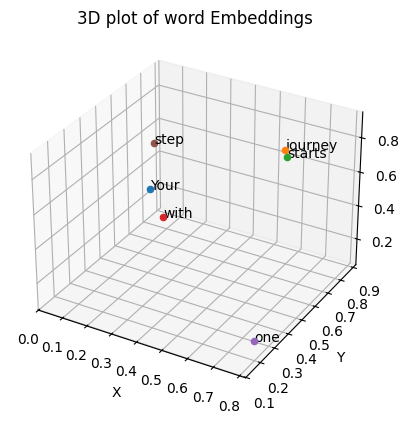

In [51]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Corresponding words
words = ['Your', 'journey', 'starts', 'with', 'one', 'step']

# Extract x, y, z coordinates
x_coords = inputs[:, 0].numpy()
y_coords = inputs[:, 1].numpy()
z_coords = inputs[:, 2].numpy()

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot each point and annotate with corresponding words
for x, y, z, word in zip(x_coords, y_coords, z_coords, words):
    ax.scatter(x, y, z)
    ax.text(x, y, z, word, fontsize = 10)

# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.title('3D plot of word Embeddings')
plt.show()

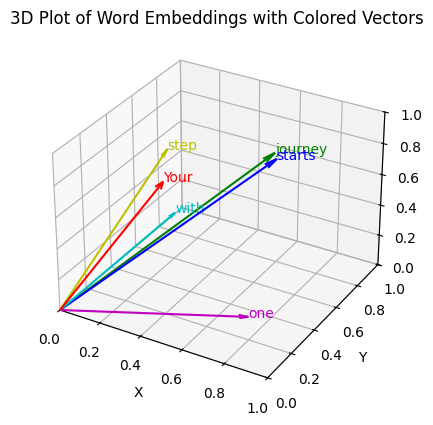

In [52]:
# Create 3D plot with vectors from origin to each point, using different colors
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define a list of colors for the vectors
colors = ['r', 'g', 'b', 'c', 'm', 'y']

# Plot each vector with a different color and annotate with the corresponding word
for (x, y, z, word, color) in zip(x_coords, y_coords, z_coords, words, colors):
    # Draw vector from origin to the point (x, y, z) with specified color and smaller arrow length ratio
    ax.quiver(0, 0, 0, x, y, z, color=color, arrow_length_ratio=0.05)
    ax.text(x, y, z, word, fontsize=10, color=color)

# Set labels for axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Set plot limits to keep arrows within the plot boundaries
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])

plt.title('3D Plot of Word Embeddings with Colored Vectors')
plt.show()

#### The second input token is the query vector

In [53]:
query = inputs[1]

attn_scores_2 = torch.empty(inputs.shape[0])
for i, x_i in enumerate(inputs):
    attn_scores_2[i] = torch.dot(x_i, query)

print(attn_scores_2)

tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865])


In [54]:
def softmax_naive(x):
    return torch.exp(x)/torch.exp(x).sum(dim=0)

attn_weights_2_naive = softmax_naive(attn_scores_2)

print("Attention Weights:", attn_weights_2_naive)
print("Sum:", attn_weights_2_naive.sum())

Attention Weights: tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
Sum: tensor(1.)


In [55]:
attn_weights_2 = torch.softmax(attn_scores_2, dim=0)
print("Attention weights:", attn_weights_2)
print("Sum:", attn_weights_2.sum())

Attention weights: tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
Sum: tensor(1.)


#### The context vector z(2) is calculated as a weighted sum of input vectors. This involves multiplying each input vector by its corresponding attention weight.

In [56]:
query = inputs[1] # 2nd input is the query 

context_vec_2 = torch.zeros(query.shape)
for i, x_i in enumerate(inputs):
    context_vec_2 += attn_weights_2[i]*x_i

print(context_vec_2)

tensor([0.4419, 0.6515, 0.5683])


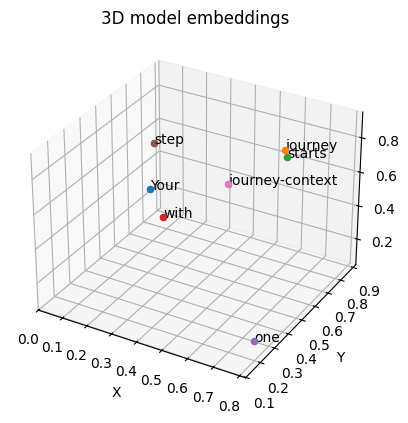

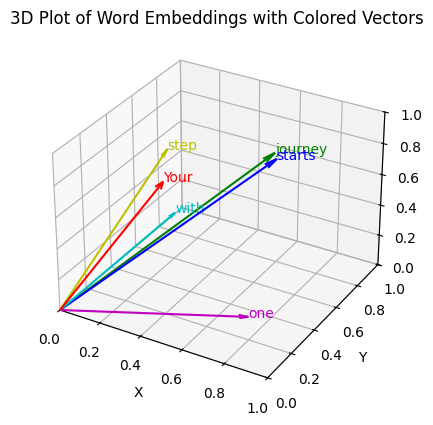

In [57]:
inputs = torch.tensor(
    [[0.43, 0.15, 0.89], # Your     (x^1)
     [0.55, 0.87, 0.66], # journey  (x^2)
     [0.57, 0.85, 0.64], # starts   (x^3)
     [0.22, 0.58, 0.33], # with     (x^4)
     [0.77, 0.25, 0.10], # one      (x^5)
     [0.05, 0.80, 0.55], # step     (x^6)
     [0.4419, 0.6515, 0.5683]]
)

words = ['Your', 'journey', 'starts', 'with', 'one', 'step', 'journey-context']

# Extract x, y, z coordinates
x_coords = inputs[:, 0].numpy()
y_coords = inputs[:, 1].numpy()
z_coords = inputs[:, 2].numpy()

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

for x, y, z, word in zip(x_coords, y_coords, z_coords, words):
    ax.scatter(x, y, z)
    ax.text(x, y, z, word, fontsize=10)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.title("3D model embeddings")
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot each vector with a different color and annotate with the corresponding word
for (x, y, z, word, color) in zip(x_coords, y_coords, z_coords, words, colors):
    # Draw vector from origin to the point (x, y, z) with specified color and smaller arrow length ratio
    ax.quiver(0, 0, 0, x, y, z, color=color, arrow_length_ratio=0.05)
    ax.text(x, y, z, word, fontsize=10, color=color)

# Set labels for axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Set plot limits to keep arrows within the plot boundaries
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])

plt.title('3D Plot of Word Embeddings with Colored Vectors')
plt.show()

#### Finding context vectors for all inputs

In [58]:
attn_scores = inputs@inputs.T
print(attn_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310, 0.7935],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865, 1.1849],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605, 1.1694],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565, 0.6626],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935, 0.5600],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450, 0.8559],
        [0.7935, 1.1849, 1.1694, 0.6626, 0.5600, 0.8559, 0.9427]])


In [59]:
attn_weights = torch.softmax(attn_scores, dim=-1)
print(attn_weights)

tensor([[0.1792, 0.1713, 0.1692, 0.1061, 0.1042, 0.1240, 0.1459],
        [0.1180, 0.2026, 0.1986, 0.1056, 0.0921, 0.1346, 0.1486],
        [0.1184, 0.2017, 0.1981, 0.1058, 0.0943, 0.1332, 0.1485],
        [0.1223, 0.1768, 0.1744, 0.1246, 0.1077, 0.1467, 0.1476],
        [0.1305, 0.1675, 0.1689, 0.1169, 0.1607, 0.1108, 0.1446],
        [0.1180, 0.1861, 0.1813, 0.1211, 0.0842, 0.1615, 0.1478],
        [0.1277, 0.1889, 0.1860, 0.1121, 0.1011, 0.1359, 0.1483]])


In [60]:
row_2_sum = sum([0.1184, 0.2017, 0.1981, 0.1058, 0.0943, 0.1332, 0.1485])
print(row_2_sum)
print("Sum of all elements in a row:" , attn_weights.sum(dim=-1))

1.0
Sum of all elements in a row: tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])


In [61]:
all_context_weights = attn_weights @ inputs
print(all_context_weights)

tensor([[0.4420, 0.6016, 0.5774],
        [0.4419, 0.6515, 0.5683],
        [0.4429, 0.6499, 0.5673],
        [0.4321, 0.6330, 0.5536],
        [0.4635, 0.5997, 0.5326],
        [0.4213, 0.6505, 0.5651],
        [0.4397, 0.6372, 0.5635]])


In [62]:
print("Previous 2nd context vector:", context_vec_2)

Previous 2nd context vector: tensor([0.4419, 0.6515, 0.5683])


# Implementing Attention with trainable Weights

In [63]:
inputs = torch.tensor(
  [[0.43, 0.15, 0.89], # Your     (x^1)
   [0.55, 0.87, 0.66], # journey  (x^2)
   [0.57, 0.85, 0.64], # starts   (x^3)
   [0.22, 0.58, 0.33], # with     (x^4)
   [0.77, 0.25, 0.10], # one      (x^5)
   [0.05, 0.80, 0.55]] # step     (x^6)
)

In [64]:
x_2 = inputs[1] #A
batch_size, d_in = inputs.shape #B
d_out = 2 #C

In [65]:
torch.manual_seed(123)
W_query = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)
W_key = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)
W_value = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)

In [66]:
print(W_query)
print(W_key)
print(W_value)

Parameter containing:
tensor([[0.2961, 0.5166],
        [0.2517, 0.6886],
        [0.0740, 0.8665]])
Parameter containing:
tensor([[0.1366, 0.1025],
        [0.1841, 0.7264],
        [0.3153, 0.6871]])
Parameter containing:
tensor([[0.0756, 0.1966],
        [0.3164, 0.4017],
        [0.1186, 0.8274]])


In [67]:
query_2 = x_2 @ W_query
key_2 = x_2 @ W_key
value_2 = x_2 @ W_value

In [68]:
print(query_2, key_2, value_2) 

tensor([0.4306, 1.4551]) tensor([0.4433, 1.1419]) tensor([0.3951, 1.0037])


In [69]:
queries = inputs @ W_query
keys = inputs @ W_key
values = inputs @ W_value

In [70]:
print("Keys shape:",keys.shape)
print("values shape:",values.shape)
print("queries shape:", queries.shape)

Keys shape: torch.Size([6, 2])
values shape: torch.Size([6, 2])
queries shape: torch.Size([6, 2])


print(values)

In [71]:
# Attention score of w22
keys_2 = keys[1] #A
attn_score_22 = query_2.dot(keys_2)
print(attn_score_22)

tensor(1.8524)


In [72]:
# Attention score of 2nd row in the query wrt keys matrix
attn_scores_2 - query_2 @ keys.T
print(attn_scores_2)

tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865])


In [73]:
# Attention scores of every qurery wrt all the other keys
attn_scores = queries @ keys.T
print(attn_scores)

tensor([[0.9231, 1.3545, 1.3241, 0.7910, 0.4032, 1.1330],
        [1.2705, 1.8524, 1.8111, 1.0795, 0.5577, 1.5440],
        [1.2544, 1.8284, 1.7877, 1.0654, 0.5508, 1.5238],
        [0.6973, 1.0167, 0.9941, 0.5925, 0.3061, 0.8475],
        [0.6114, 0.8819, 0.8626, 0.5121, 0.2707, 0.7307],
        [0.8995, 1.3165, 1.2871, 0.7682, 0.3937, 1.0996]])


In [74]:
# Computing the attention weights by scaling the attention scores and usning the softmax function.
d_k = keys.shape[-1]
attn_weights_2 = torch.softmax(attn_scores_2/d_k**0.5, dim=-1)
print(attn_weights_2)
print(d_k)

tensor([0.1476, 0.2164, 0.2134, 0.1365, 0.1240, 0.1621])
2


#### Now we scale the attention scores by dividing them by the square root of the embedding dimensions of the keys.

In [75]:
tensor = torch.tensor([0.1, -0.2, 0.3, -0.2, 0.5])

# Applying softmax function w/o scaling
softmax_result = torch.softmax(tensor,dim=-1)
print("softmax without scaling:",softmax_result)

scaled_tensor = tensor*8
softmax_scaled = torch.softmax(scaled_tensor, dim=-1)
print("Softmax after scaling (tensor*8):" , softmax_scaled)

softmax without scaling: tensor([0.1925, 0.1426, 0.2351, 0.1426, 0.2872])
Softmax after scaling (tensor*8): tensor([0.0326, 0.0030, 0.1615, 0.0030, 0.8000])


#### Reasons for applying sqrt
#### 1.

In [76]:
import numpy as np

# Function to calculate the varience before and after scaling
def compute_variance(dim, num_trails=1000):
    dot_products = []
    scaled_dot_products = []

    # Generate multiple random vectors and compute dot products
    for _ in range(num_trails):
        q = np.random.randn(dim)
        k = np.random.randn(dim)

        # Calculating dot product
        dot_product = np.dot(q, k)
        dot_products.append(dot_product)
        
        # Scaling the computed dot products
        scaled_dot_product = dot_product/np.sqrt(dim)
        scaled_dot_products = np.var(scaled_dot_product)
        
    variance_before_scaling = np.var(dot_products)
    variance_after_scaling = np.var(scaled_dot_products)

    return variance_before_scaling , variance_after_scaling

variance_before_5, variance_after_5 = compute_variance(5)
print(f"Variance before scaling (dim=5): {variance_before_5}")
print(f"variance after scaling (dim=5): {variance_after_5}")

variance_before_100, variance_after_100 = compute_variance(100)
print(f"Variance before scaling (dim=5): {variance_before_100}")
print(f"variance after scaling (dim=5): {variance_after_100}")


Variance before scaling (dim=5): 4.861417014742436
variance after scaling (dim=5): 0.0
Variance before scaling (dim=5): 101.81234220892723
variance after scaling (dim=5): 0.0


In [77]:
# Now we compute context vectors as weighted sum of other value vectors.
# The attention weights serve as the weighting factor that weighs the respective importance of each value vector 

context_vector_2 = attn_weights_2 @ values
print(context_vector_2)

tensor([0.2991, 0.8010])


In [78]:
attn_weights = torch.softmax(attn_scores/d_k**0.5, dim=-1)
print(f"attention weights: {attn_weights}")

context_vector = attn_weights @ values
print(f"context vector: {context_vector}")

attention weights: tensor([[0.1551, 0.2104, 0.2059, 0.1413, 0.1074, 0.1799],
        [0.1500, 0.2264, 0.2199, 0.1311, 0.0906, 0.1820],
        [0.1503, 0.2256, 0.2192, 0.1315, 0.0914, 0.1819],
        [0.1591, 0.1994, 0.1962, 0.1477, 0.1206, 0.1769],
        [0.1610, 0.1949, 0.1923, 0.1501, 0.1265, 0.1752],
        [0.1557, 0.2092, 0.2048, 0.1419, 0.1089, 0.1794]])
context vector: tensor([[0.2996, 0.8053],
        [0.3061, 0.8210],
        [0.3058, 0.8203],
        [0.2948, 0.7939],
        [0.2927, 0.7891],
        [0.2990, 0.8040]])


# Implementing a Compact Self Attention Classs

#### Here we will incorperate causal attention and dropout modification in self-attention

In [79]:
import torch.nn as nn

class selfAttention_v1(nn.Module):

    def __init__(self, d_in, d_out):
        super().__init__()
        self.W_query = nn.Parameter(torch.rand(d_in,d_out))
        self.W_key = nn.Parameter(torch.rand(d_in,d_out))
        self.W_value = nn.Parameter(torch.rand(d_in,d_out))
    
    def forward(self,x):
        keys = x @ self.W_key
        queries = x @ self.W_query
        values = x @ self.W_value

        attn_score = queries @ keys.T
        attn_weights = torch.softmax(
            attn_score/keys.shape[-1]**0.5,dim=-1
        )
        context_vec = attn_weights @ values
        return context_vec

In [80]:
torch.manual_seed(123)
sa_v1 = selfAttention_v1(d_in, d_out)
print(sa_v1(inputs))

tensor([[0.2996, 0.8053],
        [0.3061, 0.8210],
        [0.3058, 0.8203],
        [0.2948, 0.7939],
        [0.2927, 0.7891],
        [0.2990, 0.8040]], grad_fn=<MmBackward0>)


In [81]:
class selfAttention_v2(nn.Module):

    def __init__(self, d_in, d_out, qkv_bias=False):
        super().__init__()
        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)

    def forward(self, x):
        keys = self.W_key(x)
        queries = self.W_query(x)
        values = self.W_value(x)

        attn_scores = queries @ keys.T
        attn_weights = torch.softmax(attn_scores/keys.shape[-1]**0.5,dim=-1)
        context_vec = attn_weights @ values
        return context_vec
        
        
        

In [82]:
torch.manual_seed(123)
sa_v2 = selfAttention_v2(d_in, d_out)
print(sa_v2(inputs))

tensor([[-0.5337, -0.1051],
        [-0.5323, -0.1080],
        [-0.5323, -0.1079],
        [-0.5297, -0.1076],
        [-0.5311, -0.1066],
        [-0.5299, -0.1081]], grad_fn=<MmBackward0>)


# Hiding Future Words with Causal Attention

In [83]:
inputs = torch.tensor(
  [[0.43, 0.15, 0.89], # Your     (x^1)
   [0.55, 0.87, 0.66], # journey  (x^2)
   [0.57, 0.85, 0.64], # starts   (x^3)
   [0.22, 0.58, 0.33], # with     (x^4)
   [0.77, 0.25, 0.10], # one      (x^5)
   [0.05, 0.80, 0.55]] # step     (x^6)
)

In [84]:
queries = sa_v2.W_query(inputs)
keys = sa_v2.W_key(inputs)
attn_scores = queries @ keys.T
attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=1)
print(attn_weights)

tensor([[0.1717, 0.1762, 0.1761, 0.1555, 0.1627, 0.1579],
        [0.1636, 0.1749, 0.1746, 0.1612, 0.1605, 0.1652],
        [0.1637, 0.1749, 0.1746, 0.1611, 0.1606, 0.1651],
        [0.1636, 0.1704, 0.1702, 0.1652, 0.1632, 0.1674],
        [0.1667, 0.1722, 0.1721, 0.1618, 0.1633, 0.1639],
        [0.1624, 0.1709, 0.1706, 0.1654, 0.1625, 0.1682]],
       grad_fn=<SoftmaxBackward0>)


In [85]:
torch.ones(context_length, context_length)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

#### Pytorch tril func to create a Lower Trianghlar matrix

In [86]:
context_length = attn_scores.shape[0]
mask_simple = torch.tril(torch.ones(context_length, context_length))
print(mask_simple)

tensor([[1., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1.]])


#### The lower triangular matrix created the above elements for building a causala attention mechanism 

In [87]:
# multiplying attention weights with mask_simple matrix for creating masking effect
masked_simple = attn_weights * mask_simple
print(masked_simple)

tensor([[0.1717, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.1636, 0.1749, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.1637, 0.1749, 0.1746, 0.0000, 0.0000, 0.0000],
        [0.1636, 0.1704, 0.1702, 0.1652, 0.0000, 0.0000],
        [0.1667, 0.1722, 0.1721, 0.1618, 0.1633, 0.0000],
        [0.1624, 0.1709, 0.1706, 0.1654, 0.1625, 0.1682]],
       grad_fn=<MulBackward0>)


#### Renormalize attention weights to sum upto again in each row bydividing each element in each row with the sum in each row

In [88]:
row_sum = masked_simple.sum(dim=1, keepdim=True)
masked_simple_norm = masked_simple / row_sum
print(masked_simple_norm)

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.4833, 0.5167, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3190, 0.3408, 0.3402, 0.0000, 0.0000, 0.0000],
        [0.2445, 0.2545, 0.2542, 0.2468, 0.0000, 0.0000],
        [0.1994, 0.2060, 0.2058, 0.1935, 0.1953, 0.0000],
        [0.1624, 0.1709, 0.1706, 0.1654, 0.1625, 0.1682]],
       grad_fn=<DivBackward0>)


#### Efficient computation of masked attention weights

#### The softmax function converts its inputs into probability distribution.
#### When negative infinite values are present in the row, the softmax function treats them as zero probability

In [89]:
print(attn_scores)

tensor([[0.3111, 0.3479, 0.3471, 0.1714, 0.2350, 0.1928],
        [0.1655, 0.2602, 0.2576, 0.1445, 0.1384, 0.1790],
        [0.1667, 0.2602, 0.2577, 0.1443, 0.1391, 0.1784],
        [0.0510, 0.1080, 0.1064, 0.0643, 0.0476, 0.0835],
        [0.1415, 0.1875, 0.1863, 0.0987, 0.1121, 0.1174],
        [0.0476, 0.1192, 0.1171, 0.0731, 0.0477, 0.0966]],
       grad_fn=<MmBackward0>)


In [90]:
torch.triu(torch.ones(context_length, context_length))

tensor([[1., 1., 1., 1., 1., 1.],
        [0., 1., 1., 1., 1., 1.],
        [0., 0., 1., 1., 1., 1.],
        [0., 0., 0., 1., 1., 1.],
        [0., 0., 0., 0., 1., 1.],
        [0., 0., 0., 0., 0., 1.]])

In [91]:
mask = torch.triu(torch.ones(context_length, context_length), diagonal=1)
masked = attn_scores.masked_fill(mask.bool(), -torch.inf)
print(masked)

tensor([[0.3111,   -inf,   -inf,   -inf,   -inf,   -inf],
        [0.1655, 0.2602,   -inf,   -inf,   -inf,   -inf],
        [0.1667, 0.2602, 0.2577,   -inf,   -inf,   -inf],
        [0.0510, 0.1080, 0.1064, 0.0643,   -inf,   -inf],
        [0.1415, 0.1875, 0.1863, 0.0987, 0.1121,   -inf],
        [0.0476, 0.1192, 0.1171, 0.0731, 0.0477, 0.0966]],
       grad_fn=<MaskedFillBackward0>)


In [92]:
attn_weights = torch.softmax(masked/keys.shape[-1]**0.5, dim=-1)
print(attn_weights)

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.4833, 0.5167, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3190, 0.3408, 0.3402, 0.0000, 0.0000, 0.0000],
        [0.2445, 0.2545, 0.2542, 0.2468, 0.0000, 0.0000],
        [0.1994, 0.2060, 0.2058, 0.1935, 0.1953, 0.0000],
        [0.1624, 0.1709, 0.1706, 0.1654, 0.1625, 0.1682]],
       grad_fn=<SoftmaxBackward0>)


# Masking Additional Attention Weights with dropouts

#### We use dropout rate 50% which means masking half of the attention weights
#### We apply pytorch dropout implementation to  first 6x6 tensor consistting of ines for illustration purpose

In [93]:
example = torch.ones(6,6)
print(example)

tensor([[1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.]])


In [94]:
torch.manual_seed(123)
dropout = nn.Dropout(0.5)
example = torch.ones(6,6)
print(dropout(example))

tensor([[2., 2., 0., 2., 2., 0.],
        [0., 0., 0., 2., 0., 2.],
        [2., 2., 2., 2., 0., 2.],
        [0., 2., 2., 0., 0., 2.],
        [0., 2., 0., 2., 0., 2.],
        [0., 2., 2., 2., 2., 0.]])


#### Apply dropout to the attention weight matrix

In [95]:
torch.manual_seed(123)
print(dropout(attn_weights))

tensor([[2.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.6380, 0.6816, 0.6804, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.5090, 0.5085, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.4120, 0.0000, 0.3869, 0.0000, 0.0000],
        [0.0000, 0.3418, 0.3413, 0.3308, 0.3249, 0.0000]],
       grad_fn=<MulBackward0>)


#### The above resulting attention weight matrix now has additional elements zeroed out and remaining ones rescaled.

# Implementing compact causal attention class

#### Here we will incorporate causal attention and dropout modifications into self-attention python class

#### 2 inputs with 6 tokens each and each token has three dimensions. The 2 inputs is the batch size .
#### Hence the dimension of the matrix formed will be (2,6,3).

In [96]:
batch = torch.stack((inputs,inputs), dim=0)
print(batch)
print(batch.size())

tensor([[[0.4300, 0.1500, 0.8900],
         [0.5500, 0.8700, 0.6600],
         [0.5700, 0.8500, 0.6400],
         [0.2200, 0.5800, 0.3300],
         [0.7700, 0.2500, 0.1000],
         [0.0500, 0.8000, 0.5500]],

        [[0.4300, 0.1500, 0.8900],
         [0.5500, 0.8700, 0.6600],
         [0.5700, 0.8500, 0.6400],
         [0.2200, 0.5800, 0.3300],
         [0.7700, 0.2500, 0.1000],
         [0.0500, 0.8000, 0.5500]]])
torch.Size([2, 6, 3])


#### The CausalAttention class is similar to the selfAttention class , except now we add a dropout and causal mask.

Step 1: Compared to the previous SelfAttention_v1 class, we added a dropout layer.
    
Step 2: The register_buffer call is also a new addition (more information is provided in the following text).

Step 3:  We transpose dimensions 1 and 2, keeping the batch dimension at the first position (0).

Step 4: In PyTorch, operations with a trailing underscore are performed in-place, avoiding unnecessary memory
copies

In [97]:
import torch
import torch.nn as nn

class CausalAttention(nn.Module):
    def __init__(self, d_in, d_out, context_length, dropout=0.0, qkv_bias=True):
        super().__init__()
        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key   = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.dropout = nn.Dropout(dropout)

        # Create causal mask (upper triangular part is masked)
        self.register_buffer(
            'mask',
            torch.triu(torch.ones(context_length, context_length), diagonal=1)
        )

    def forward(self, x):
        b, num_tokens, d_in = x.shape

        queries = self.W_query(x)
        keys    = self.W_key(x)
        values  = self.W_value(x)

        # Attention score calculation
        attn_scores = queries @ keys.transpose(1, 2)
        attn_scores.masked_fill_(
            self.mask.bool()[:num_tokens, :num_tokens],
            float('-inf')
        )

        # Apply softmax and dropout
        attn_weights = torch.softmax(attn_scores / (keys.shape[-1] ** 0.5), dim=-1)
        attn_weights = self.dropout(attn_weights)

        # Weighted sum of values
        context_vectors = attn_weights @ values
        return context_vectors


In [98]:
print(d_in)
print(d_out)

3
2


In [99]:
torch.manual_seed(123)
cpntext_length = batch.shape[1]
ca = CausalAttention(d_in, d_out, context_length, 0.0)
context_vecs = ca(batch)
print("context vectors shape: ", context_vecs)

context vectors shape:  tensor([[[-0.0960,  0.7940],
         [ 0.0285,  0.9387],
         [ 0.0657,  0.9850],
         [ 0.1062,  0.9604],
         [ 0.0659,  0.9308],
         [ 0.1188,  0.9375]],

        [[-0.0960,  0.7940],
         [ 0.0285,  0.9387],
         [ 0.0657,  0.9850],
         [ 0.1062,  0.9604],
         [ 0.0659,  0.9308],
         [ 0.1188,  0.9375]]], grad_fn=<UnsafeViewBackward0>)


#### The context vector is a 3D tensor where each token is represented in 2D embedding.

# Extending Single head attention mechanism to Multi-Head attention mechanism.

In [109]:
import torch
import torch.nn as nn

class MultiHeadAttentionWrapper(nn.Module):
    def __init__(self, d_in, d_out, context_length, dropout, num_heads, qkv_bias=False):
        super().__init__()
        self.heads = nn.ModuleList(
            [CausalAttention(d_in, d_out, context_length, dropout, qkv_bias)
             for _ in range(num_heads)]
        )

    def forward(self, x):
        return torch.cat([head(x) for head in self.heads], dim=-1)

#### To illustrate concrete example we can implement multihead attention instead of causal attention

In [112]:
inputs = torch.tensor(
  [[0.43, 0.15, 0.89], # Your     (x^1)
   [0.55, 0.87, 0.66], # journey  (x^2)
   [0.57, 0.85, 0.64], # starts   (x^3)
   [0.22, 0.58, 0.33], # with     (x^4)
   [0.77, 0.25, 0.10], # one      (x^5)
   [0.05, 0.80, 0.55]] # step     (x^6)
)
batch = torch.stack((inputs, inputs), dim=0)
print(batch.shape) 

torch.Size([2, 6, 3])


In [113]:
torch.manual_seed(123)

batch = torch.randn(4, 10, 3)  # (batch_size, sequence_length, d_in)
context_length = batch.shape[1]
d_in, d_out = 3, 2

mha = MultiHeadAttentionWrapper(d_in, d_out, context_length, 0.0, num_heads=2)
context_vecs = mha(batch)

print(context_vecs)
print("context_vecs.shape:", context_vecs.shape)

tensor([[[ 4.6713e-02, -1.9443e-01, -1.8257e-01,  2.8647e-01],
         [-4.9652e-02,  9.6792e-02,  1.0829e-01, -1.4360e-01],
         [-4.3168e-02,  1.7504e-01,  1.0843e-01, -2.6365e-01],
         [ 1.4485e-01,  6.6400e-02, -9.2389e-02, -5.5164e-02],
         [-1.3602e-01,  9.9999e-02,  7.2665e-02, -7.1066e-02],
         [-1.9666e-02,  2.3785e-03,  7.9720e-02,  5.2377e-03],
         [-1.9299e-01,  1.1050e-01,  2.8011e-01, -1.7375e-01],
         [-3.6364e-01,  6.3889e-02,  1.4692e-01,  7.4083e-02],
         [-2.7781e-01,  6.9530e-02,  4.0929e-01, -2.3019e-01],
         [-1.5531e-02,  1.0155e-01,  2.0285e-01, -2.3788e-01]],

        [[ 2.0008e+00, -5.2429e-01, -2.0538e+00,  4.2153e-01],
         [ 1.2069e+00, -1.0518e-01, -8.2104e-01, -2.4387e-01],
         [ 1.1230e+00, -1.4846e-01, -1.0634e+00,  4.4815e-03],
         [ 7.2808e-01,  9.1148e-02, -7.0885e-01, -2.1622e-01],
         [ 3.9432e-01,  1.1621e-01, -3.8965e-01, -1.9515e-01],
         [ 4.8464e-01,  1.7423e-02, -5.6286e-01, -1.3

# Implementing Multi-head with Weight Splits

In [122]:
import torch
import torch.nn as nn

class MultiHeadAttention(nn.Module):
    def __init__(self, d_in, d_out, context_length, dropout, num_heads, qkv_bias=False):
        super().__init__()
        assert d_out % num_heads == 0, "d_out must be divisible by number of heads"

        self.d_out = d_out
        self.num_heads = num_heads
        self.head_dim = d_out // num_heads

        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.out_proj = nn.Linear(d_out, d_out)
        self.dropout = nn.Dropout(dropout)

        self.register_buffer(
            "mask",
            torch.triu(torch.ones(context_length, context_length), diagonal=1)
        )

    def forward(self, x):
        b, num_tokens, _ = x.shape

        # Linear projections
        queries = self.W_query(x)
        keys = self.W_key(x)
        values = self.W_value(x)

        # Reshape and transpose for multi-head attention
        queries = queries.view(b, num_tokens, self.num_heads, self.head_dim).transpose(1, 2)
        keys = keys.view(b, num_tokens, self.num_heads, self.head_dim).transpose(1, 2)
        values = values.view(b, num_tokens, self.num_heads, self.head_dim).transpose(1, 2)

        # Scaled dot-product attention
        attn_scores = queries @ keys.transpose(-2, -1)
        attn_scores = attn_scores / (self.head_dim ** 0.5)

        # Apply causal mask
        mask_bool = self.mask.bool()[:num_tokens, :num_tokens]
        attn_scores = attn_scores.masked_fill(mask_bool, float('-inf'))

        # Softmax and dropout
        attn_weights = torch.softmax(attn_scores, dim=-1)
        attn_weights = self.dropout(attn_weights)

        # Apply attention weights to values
        context_vec = attn_weights @ values
        context_vec = context_vec.transpose(1, 2).contiguous().view(b, num_tokens, self.d_out)

        # Final projection
        context_vec = self.out_proj(context_vec)

        return context_vec


#### Multi-Head Attention Class

In [123]:
torch.manual_seed(123)

# Define the tensor with 3 rows and 6 columns
inputs = torch.tensor(
    [[0.43, 0.15, 0.89, 0.55, 0.87, 0.66],  # Row 1
     [0.57, 0.85, 0.64, 0.22, 0.58, 0.33],  # Row 2
     [0.77, 0.25, 0.10, 0.05, 0.80, 0.55]]  # Row 3
)

batch = torch.stack((inputs, inputs), dim=0)
print(batch.shape) 

batch_size, context_length, d_in = batch.shape
d_out = 6
mha = MultiHeadAttention(d_in, d_out, context_length, 0.0, num_heads=2)
context_vecs = mha(batch)
print(context_vecs)
print("context_vecs.shape:", context_vecs.shape)

torch.Size([2, 3, 6])
tensor([[[ 0.1569, -0.0873,  0.0210,  0.0215, -0.3243, -0.2518],
         [ 0.1117, -0.0547,  0.0406, -0.0213, -0.3251, -0.2993],
         [ 0.1196, -0.0491,  0.0318, -0.0635, -0.2788, -0.2578]],

        [[ 0.1569, -0.0873,  0.0210,  0.0215, -0.3243, -0.2518],
         [ 0.1117, -0.0547,  0.0406, -0.0213, -0.3251, -0.2993],
         [ 0.1196, -0.0491,  0.0318, -0.0635, -0.2788, -0.2578]]],
       grad_fn=<ViewBackward0>)
context_vecs.shape: torch.Size([2, 3, 6])


# Implementing a GPT Model from Scratch to Generate Text

In [124]:
GPT_CONFIG_124M = {
    "vocab_size": 50257,    # Vocabulary size
    "context_length": 1024, # Context length
    "emb_dim": 768,         # Embedding dimension
    "n_heads": 12,          # Number of attention heads
    "n_layers": 12,         # Number of layers
    "drop_rate": 0.1,       # Dropout rate
    "qkv_bias": False       # Query-Key-Value bias
}

#### GPT Architectre Part 1 : Implementing Dummy GPT Model

1. Use placeholder transformer block
2. Use placeholder for layer normalization

In [ ]:
class DummyGPTModel(nn.Module):
    def __inti__(self, cfg):
        super().__init__()
        self.tok_emb = nn.Embeddings(cfg["vocab_size"], cfg["emb_dim"])
        self.pos_emb = nn.Embeddings(cfg["context_length"],cfg["emb_dim"])
        self.drop_emb = nn.Embeddingd(cfg["drop_emb"])

        # Use placeholder for TransformerBlock
        self.trf_blocks = nn.Sequentials(
            *[DummytransformerBlock(cfg) for _ in range(cfg["n_layer"])])

        # Use placeholder for LayerNorm
        self.final_norm = DummyLayerNorm(cfg["emb_dim"])
        self.out_head = nn.Linear